In [1]:
import matplotlib
import numpy as np
from scipy.spatial import KDTree
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## utility functions

In [2]:
def show_cloud(points_plt, elev=30, azim=45):
    ax = plt.axes(projection='3d')
    ax.scatter(points_plt[:,0], points_plt[:,1], points_plt[:,2], s=0.01)
    ax.view_init(elev, azim)
    plt.show()

def show_cluster_cloud(points_plt,labels, elev=30, azim=45):
    ax = plt.axes(projection='3d')
    ax.scatter(points_plt[:,0], points_plt[:,1], points_plt[:,2] ,c=labels, s=0.02, cmap='tab20c')
    ax.view_init(elev, azim)
    plt.show()

def show_scatter(x,y):
    plt.scatter(x, y)
    plt.show()

def get_ground_level(pcd):
    hist, bin_edges = np.histogram(pcd, bins=5)
    ground_level = bin_edges[np.argmax(hist)]
    return ground_level


## read file containing point cloud data

(72067, 3)


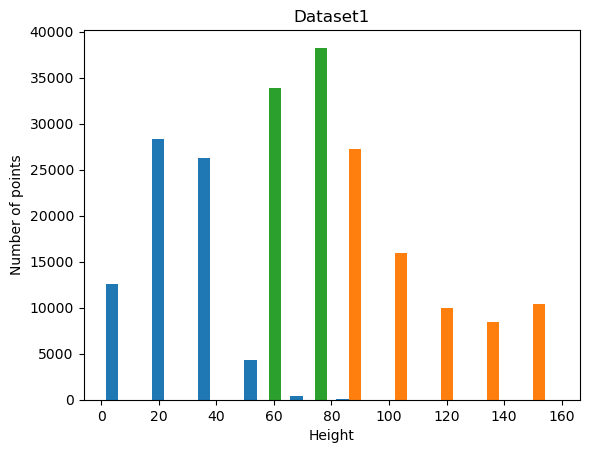

In [3]:
pcd = np.load("dataset1.npy")
print(pcd.shape)

hist, bin_edges = np.histogram(pcd)
plt.hist(pcd)
plt.xlabel("Height")
plt.ylabel("Number of points")
plt.title("Dataset1")
plt.show()


(84588, 3)


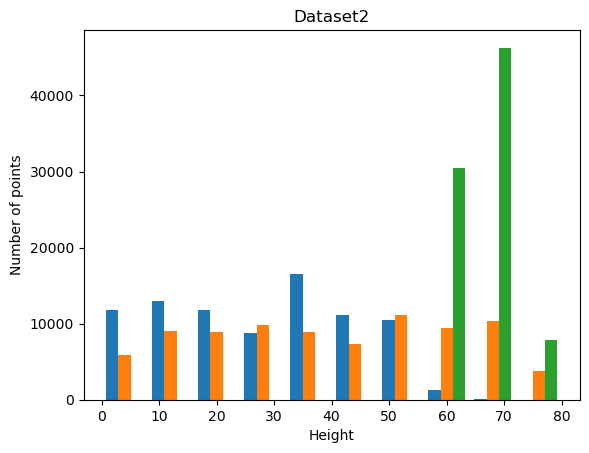

In [4]:
pcd2 = np.load("dataset2.npy")
print(pcd2.shape)

hist, bin_edges = np.histogram(pcd2)
plt.hist(pcd2)
plt.xlabel("Height")
plt.ylabel("Number of points")
plt.title("Dataset2")
plt.show()

## Task 1 (3) - Remove ground plane

find the best value for the ground level
One way to do it is useing a histogram 
np.histogram

update the function get_ground_level() with your changes

For both the datasets
Report the ground level in the readme file in your github project
Add the histogram plots to your project readme

64.08659999992815
above ground shape (38239, 3)


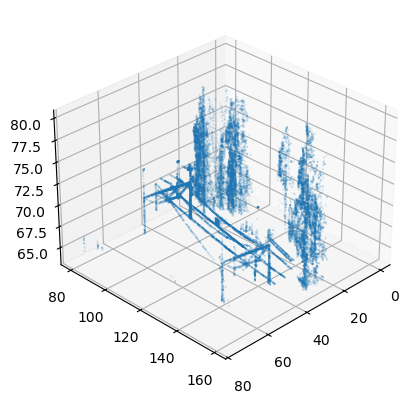

In [5]:
pcd = np.load("dataset1.npy")

est_ground_level = get_ground_level(pcd)
print(est_ground_level)

pcd_above_ground = pcd[pcd[:,2] > est_ground_level] 

print('above ground shape', pcd_above_ground.shape)

show_cloud(pcd_above_ground)

63.99839999973774
above ground shape (54122, 3)


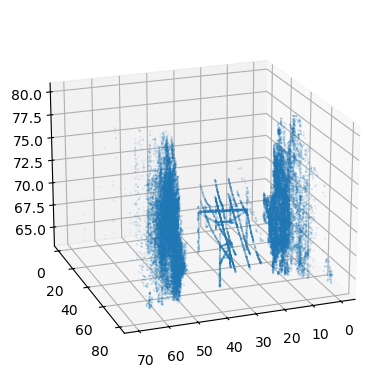

In [6]:
pcd2 = np.load("dataset2.npy")

est_ground_level2 = get_ground_level(pcd2)
print(est_ground_level2)

pcd2_above_ground = pcd2[pcd2[:,2] > est_ground_level2] 

print('above ground shape', pcd2_above_ground.shape)

show_cloud(pcd2_above_ground, elev = 20, azim = 70)

12


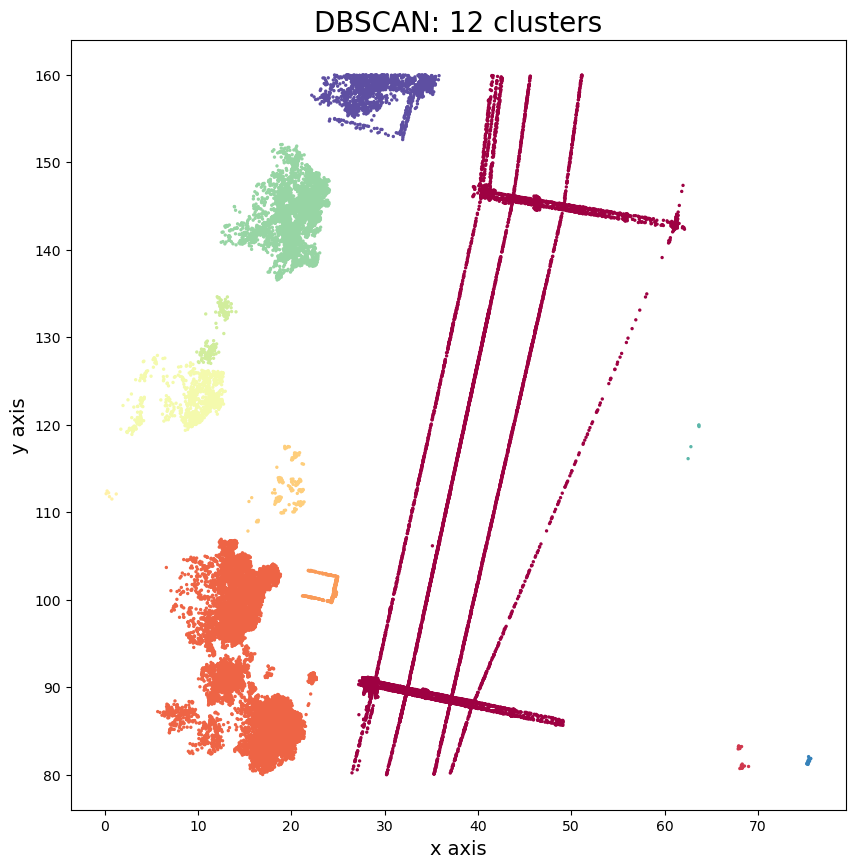

In [7]:
unoptimal_eps = 3
samples = 4
# min_samples=5
# find the elbow
clustering = DBSCAN(eps = unoptimal_eps, min_samples=samples).fit(pcd_above_ground)

#%%
clusters = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, clusters)]

print(clusters)
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(pcd_above_ground[:,0], 
            pcd_above_ground[:,1],
            c=clustering.labels_,
            cmap=matplotlib.colors.ListedColormap(colors),
            s=2)


plt.title('DBSCAN: %d clusters' % clusters,fontsize=20)
plt.xlabel('x axis',fontsize=14)
plt.ylabel('y axis',fontsize=14)
plt.show()

We know that foliage is going to be more or equal to a distance from the railway. I thought that clustering would be better without the height so that we can have a pretty tight radius for discrimination. The goal is that the radius is big enough so that single "low res" points for the catenary is not lost, and that the foliage is its own cluster(s). When looking at the plots below from the loop, i thought that 2/2.25 is a good value for eps, as that is the lowest value before we are starting to loose low res points.

eps = 1.0, clusters = 23


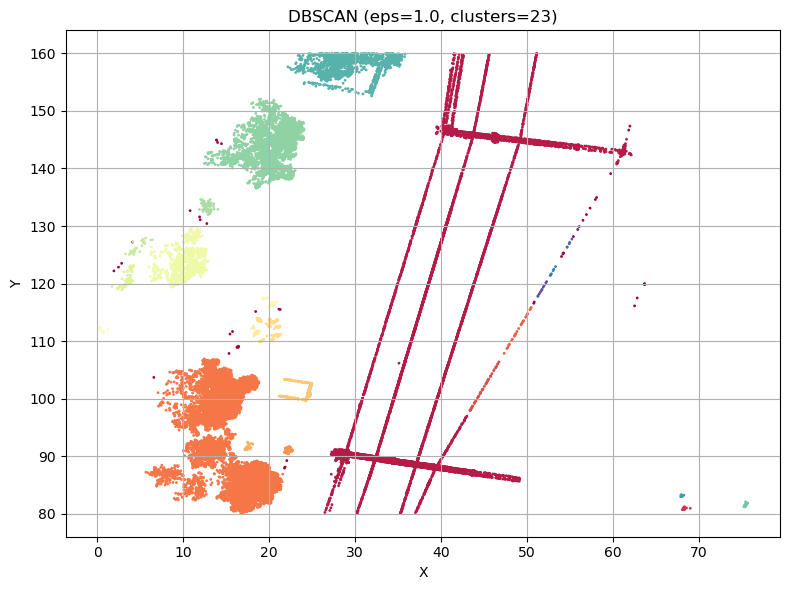

eps = 1.25, clusters = 18


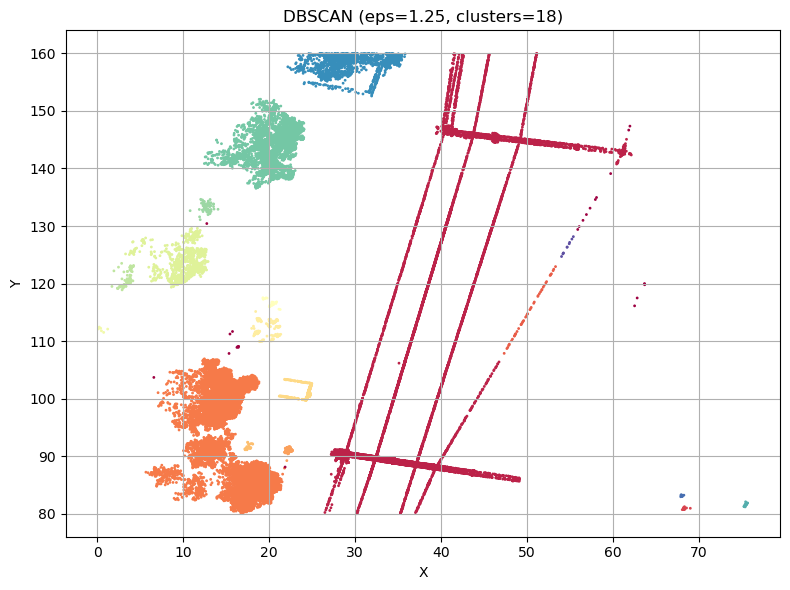

eps = 1.5, clusters = 17


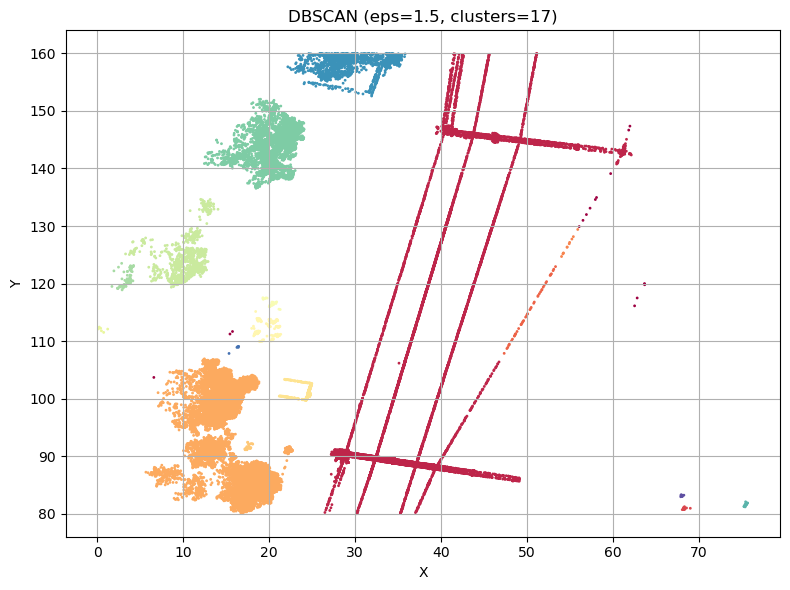

eps = 1.75, clusters = 13


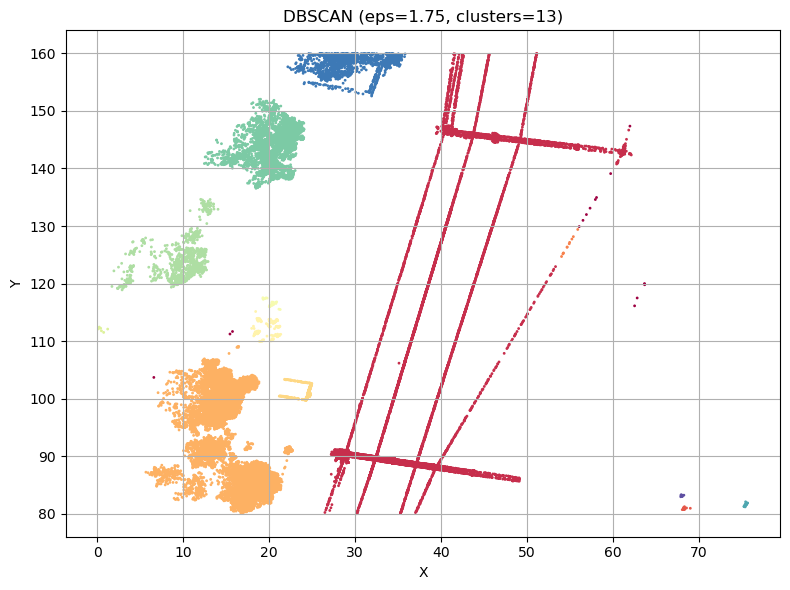

eps = 2.0, clusters = 10


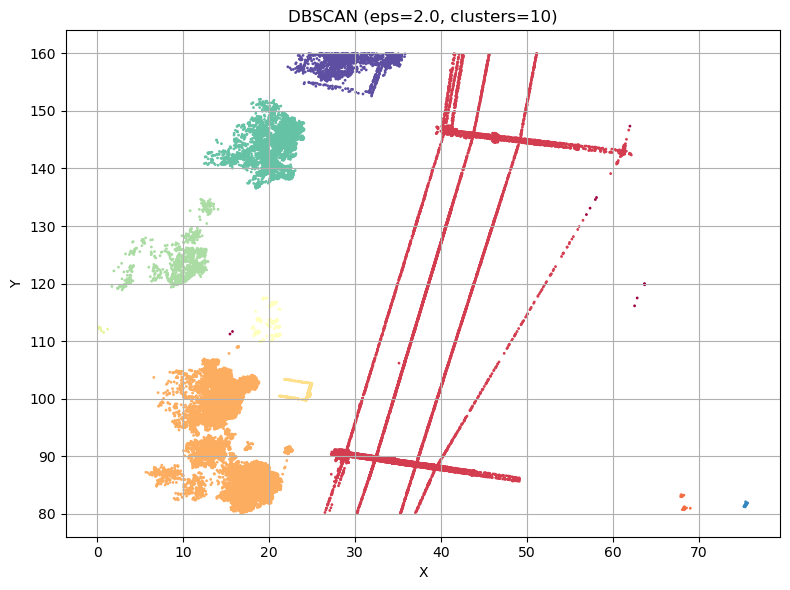

eps = 2.25, clusters = 10


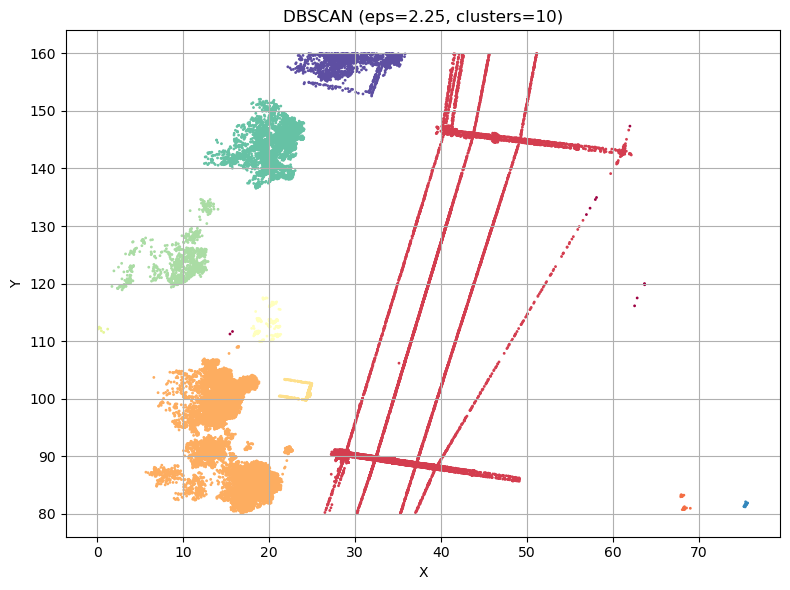

eps = 2.5, clusters = 10


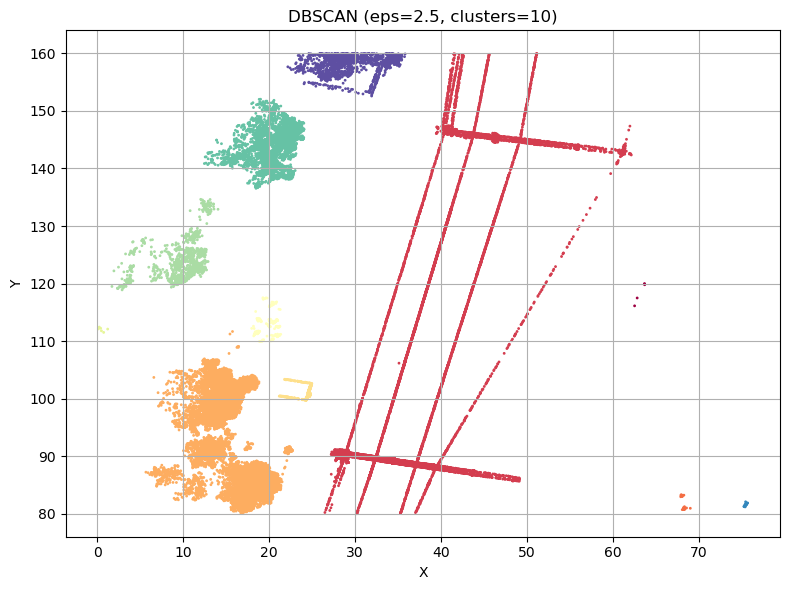

eps = 2.75, clusters = 10


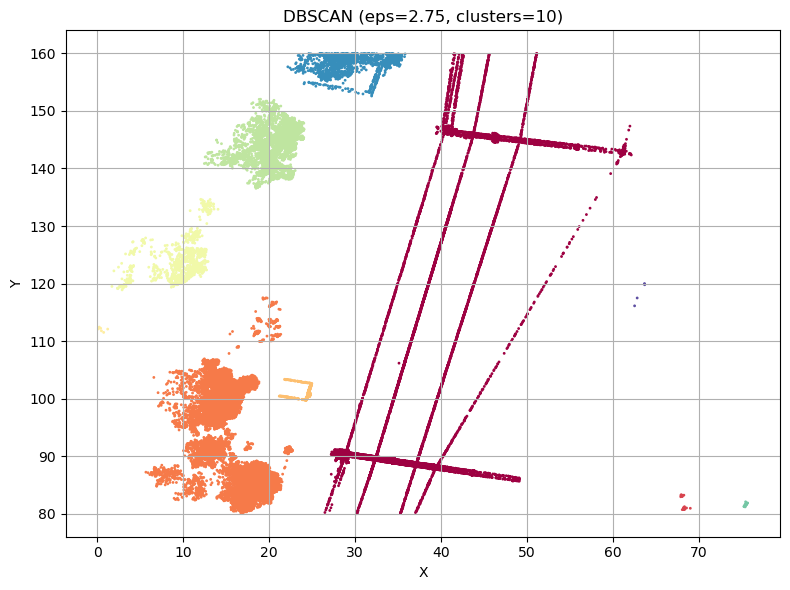

eps = 3.0, clusters = 10


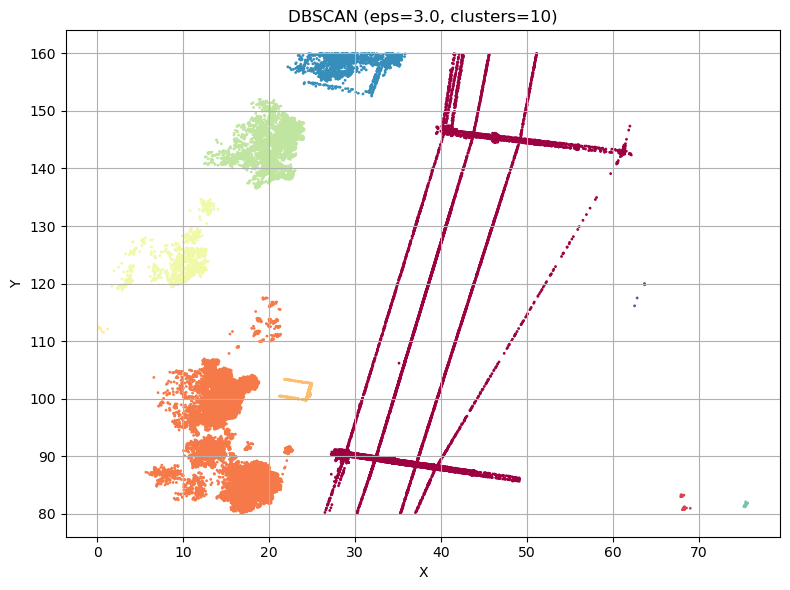

eps = 3.25, clusters = 9


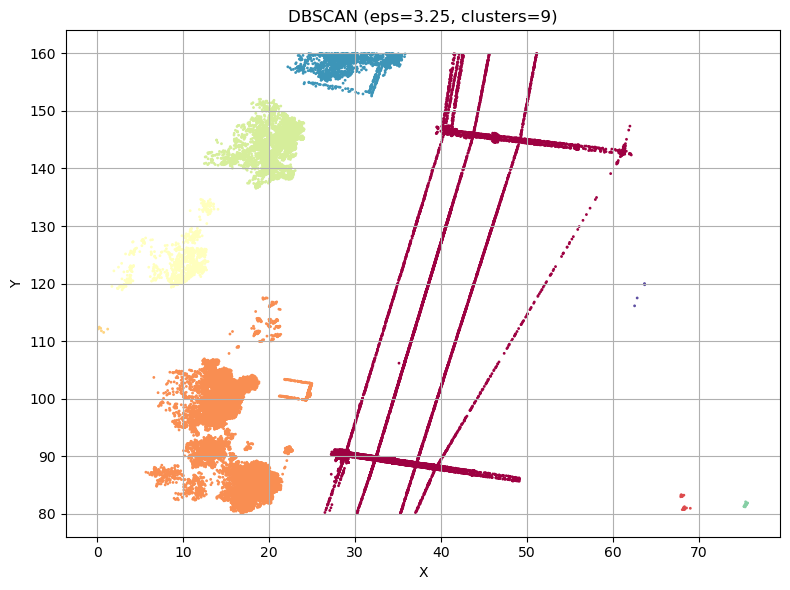

eps = 3.5, clusters = 9


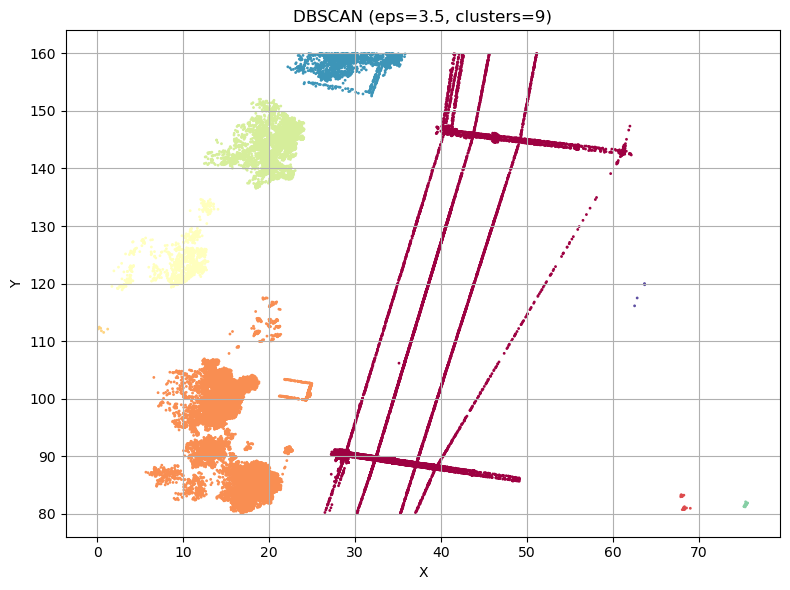

eps = 3.75, clusters = 9


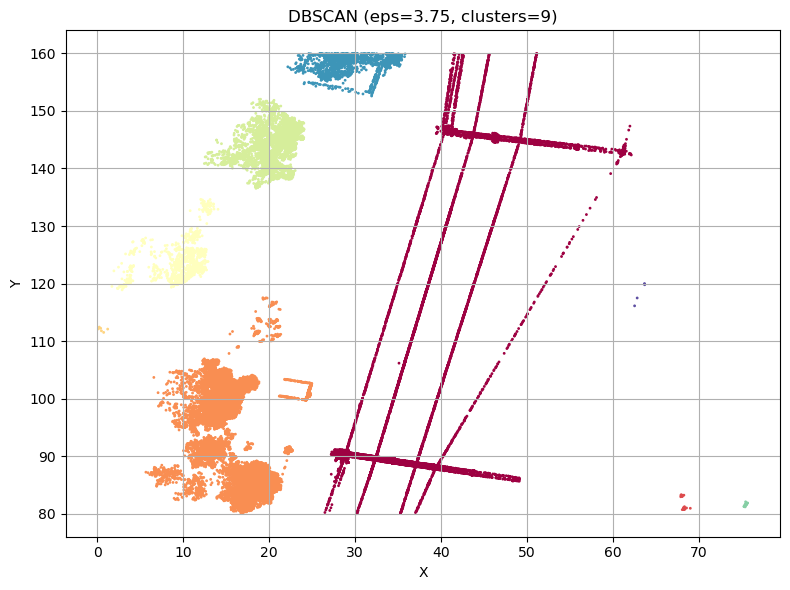

eps = 4.0, clusters = 9


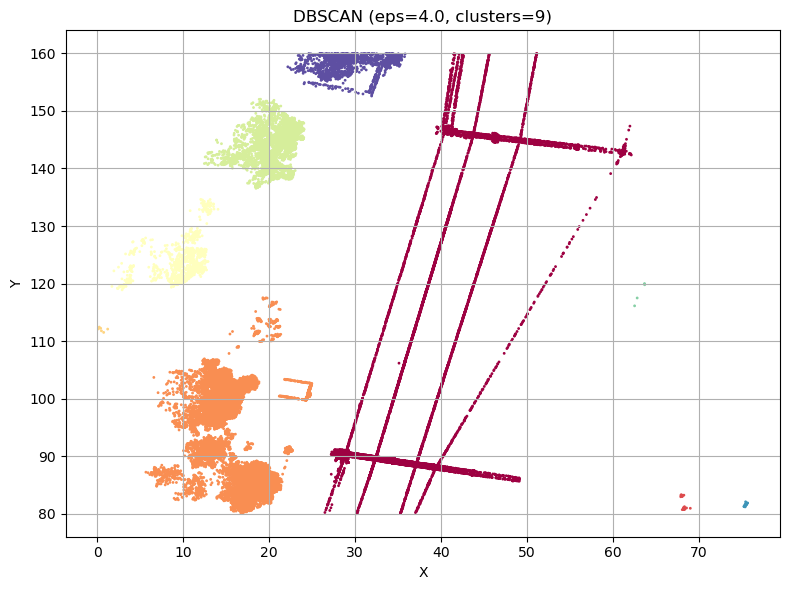

eps = 4.25, clusters = 9


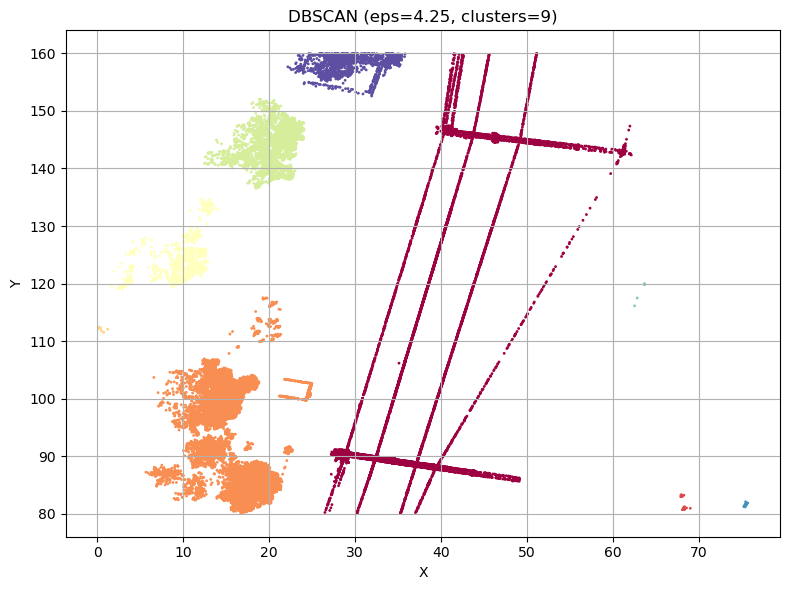

eps = 4.5, clusters = 9


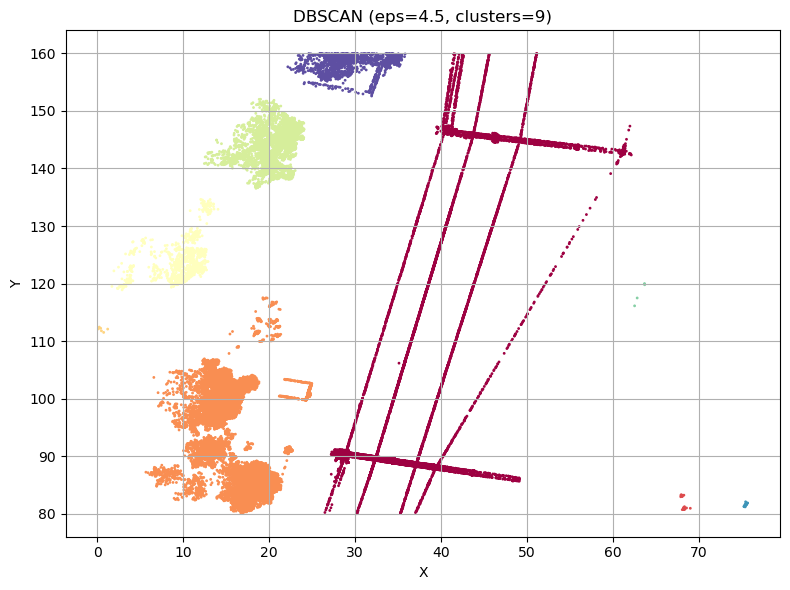

eps = 4.75, clusters = 7


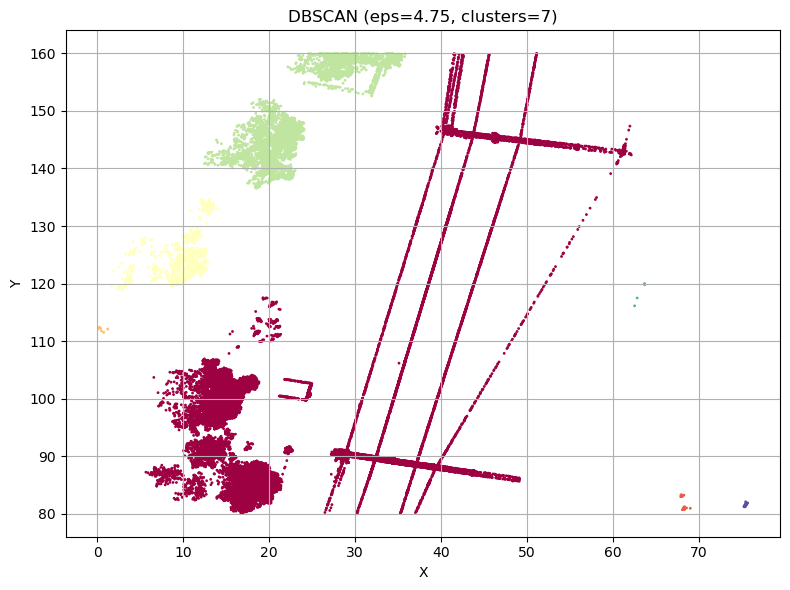

In [8]:
from sklearn.cluster import DBSCAN

def test_dbscan(points, eps_values, min_samples=5):
    for eps in eps_values:
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(points)
        labels = clustering.labels_
        clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        print(f"eps = {eps}, clusters = {clusters}")

        plt.figure(figsize=(8, 6))
        plt.scatter(points[:, 0], points[:, 1], c=labels, s=1, cmap='Spectral')
        plt.title(f'DBSCAN (eps={eps}, clusters={clusters})')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        if clusters < 4: break

points = pcd_above_ground[:, :2]

eps_range = np.arange(1,5,0.25)
test_dbscan(points, eps_range)


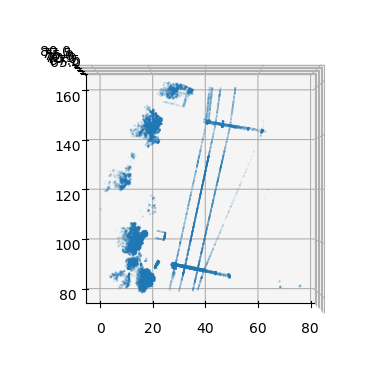

In [9]:
show_cloud(pcd_above_ground,elev=90,azim=-90)

### With 2d clustering

With 2d clustering. Clusters: 10, EPS: 2.25


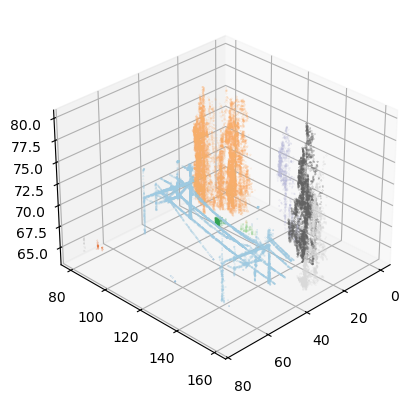

Without 2d clustering. Clusters: 10, EPS: 2.25


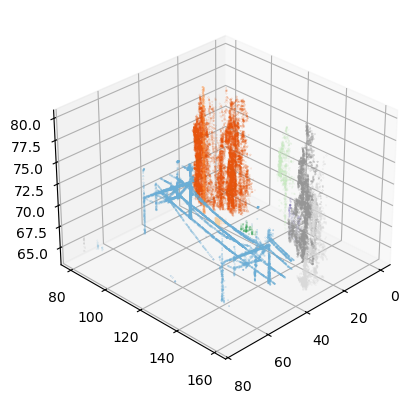

In [10]:
points = pcd_above_ground[:, :2]
eps = 2.25

clustering = DBSCAN(eps=eps, min_samples=5).fit(points)
labels = clustering.labels_
clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"With 2d clustering. Clusters: {clusters}, EPS: {eps}")
show_cluster_cloud(pcd_above_ground, labels)

print(f"Without 2d clustering. Clusters: {clusters}, EPS: {eps}")
clustering2 = DBSCAN(eps=eps, min_samples=5).fit(pcd_above_ground)
labels2 = clustering2.labels_
clusters = len(set(labels2)) - (1 if -1 in labels2 else 0)
show_cluster_cloud(pcd_above_ground, labels2)

With 2d clustering. Clusters: 12, EPS: 2.25


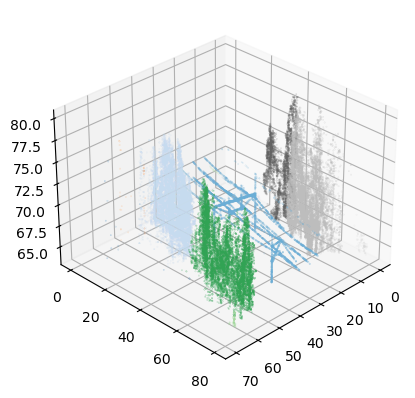

Without 2d clustering. Clusters: 12, EPS: 2.25


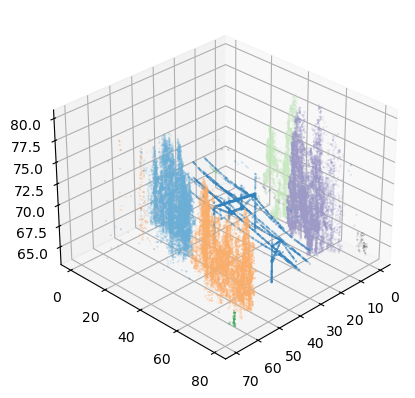

In [11]:
points = pcd2_above_ground[:, :2]
eps = 2.25


clustering = DBSCAN(eps=eps, min_samples=5).fit(points)
labels = clustering.labels_
clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"With 2d clustering. Clusters: {clusters}, EPS: {eps}")
show_cluster_cloud(pcd2_above_ground, labels)

print(f"Without 2d clustering. Clusters: {clusters}, EPS: {eps}")
clustering2 = DBSCAN(eps=eps, min_samples=5).fit(pcd2_above_ground)
labels2 = clustering2.labels_
clusters = len(set(labels2)) - (1 if -1 in labels2 else 0)
show_cluster_cloud(pcd2_above_ground, labels2)


## Task 3 

Find the largest cluster, since that should be the catenary, 
beware of the noise cluster.

Use the x,y span for the clusters to find the largest cluster

For both the datasets
Report min(x), min(y), max(x), max(y) for the catenary cluster in the Readme of your github project
Add the plot of the catenary cluster to the readme

Measure the area of clusters, biggest = catenary -> get the points.

In [12]:
eps = 2.25

clustering = DBSCAN(eps=eps, min_samples=5).fit(pcd_above_ground)
labels = clustering.labels_
clusters = len(set(labels)) - (1 if -1 in labels else 0)


In [ ]:
def get_largest_cluster(points, labels):

    # take out the largest cluster

    cluster_dict = {}
    # save points to cluster labels
    for i, label in enumerate(labels):
        if label == -1:
            continue
        if label not in cluster_dict:
            cluster_dict[label] = [points[i]]
        else:
            cluster_dict[label].append(points[i])

    for label in cluster_dict:
        cluster_dict[label] = np.array(cluster_dict[label])
    # take out the largest cluster by span in 2d
    max_span = 0
    best_label = None
    boundry_values = {}
    for label, points in cluster_dict.items():

        x_min, x_max = points[:, 0].min(), points[:, 0].max()
        y_min, y_max = points[:, 1].min(), points[:, 1].max()
        z_min, z_max = points[:, 2].min(), points[:, 2].max()
        
        catenary_span = ((x_max - x_min) * (y_max - y_min))

        x_span = points[:, 0].ptp()
        y_span = points[:, 1].ptp()
        z_span = points[:, 2].ptp()

        boundry_values

        if catenary_span > max_span:
            max_span = catenary_span
            best_label = label
            boundry_values = {
                'x_min': x_min, 'x_max': x_max,
                'y_min': y_min, 'y_max': y_max,
                'z_min': z_min, 'z_max': z_max,
                'x_span': x_span, 'y_span': y_span, 'z_span': z_span 
            }

    filtered_points = []

    x_thresh = np.percentile(cluster_dict[best_label][:,0], 10)
    y_thresh = np.percentile(cluster_dict[best_label][:,1], 10)
    z_thresh = np.percentile(cluster_dict[best_label][:,2], 90)
    x_span = boundry_values['x_span']
    y_span = boundry_values['y_span']
    z_span = boundry_values['z_span']



    if (x_span < x_thresh and y_span < y_thresh and z_span > z_thresh):
        continue 

    filtered_points.append(pts)

    return cluster_dict[best_label], boundry, filtered_points
# get_largest_cluster(pcd_above_ground,labels)
tjena, boundry, catenary = get_largest_cluster(pcd_above_ground,labels)
print(catenary)

[array([30.254, 80.292, 66.941]), array([35.297, 80.139, 66.851]), array([30.637, 81.804, 66.939]), array([30.682, 81.952, 68.594]), array([35.522, 81.125, 66.856]), array([30.791, 82.487, 66.925]), array([30.807, 82.562, 66.924]), array([35.618, 81.5  , 68.711]), array([30.853, 82.709, 68.629]), array([30.989, 83.314, 68.661]), array([35.774, 82.262, 66.863]), array([31.089, 83.767, 68.67 ]), array([31.144, 84.071, 66.935]), array([31.162, 84.146, 66.94 ]), array([35.983, 83.324, 66.85 ]), array([36.078, 83.696, 66.857]), array([36.108, 83.847, 66.854]), array([36.139, 83.992, 68.811]), array([36.215, 84.375, 66.849]), array([31.598, 86.009, 68.782]), array([36.338, 84.974, 66.842]), array([31.647, 86.233, 68.741]), array([31.682, 86.382, 68.796]), array([38.482, 84.936, 67.92 ]), array([31.8  , 86.898, 68.826]), array([31.833, 87.046, 68.831]), array([31.869, 87.272, 66.959]), array([31.918, 87.493, 66.952]), array([31.968, 87.714, 66.958]), array([32.033, 88.008, 66.951]), array([32

TypeError: list indices must be integers or slices, not tuple

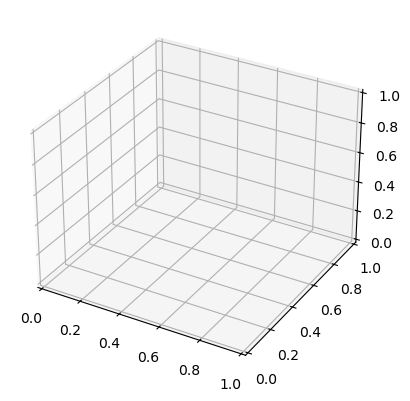

In [89]:
tjena, boundry, catenary = get_largest_cluster(pcd_above_ground,labels)

show_cloud(catenary)

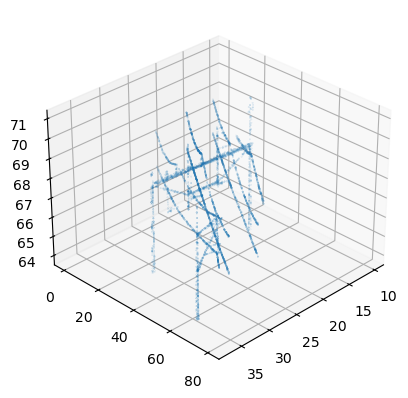

{'x_min': 10.179000000003725, 'x_max': 37.00700000001234, 'y_min': 0.04299999959766865, 'y_max': 79.97599999979138}


In [37]:
tjena, boundry = get_largest_cluster(pcd2_above_ground,labels2)
show_cloud(tjena)
print(boundry)

If we now remove everything that is not perfectly straight, we should be able to extract the catenary only. If the combine linerity and verticality 

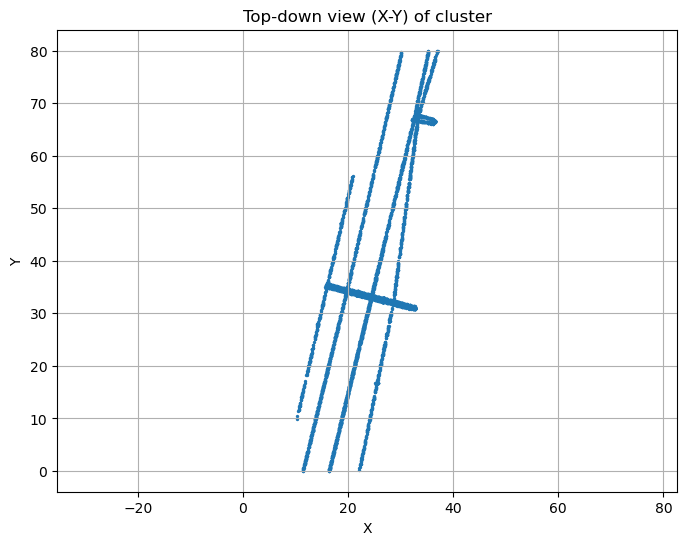

0.9519242723570754
